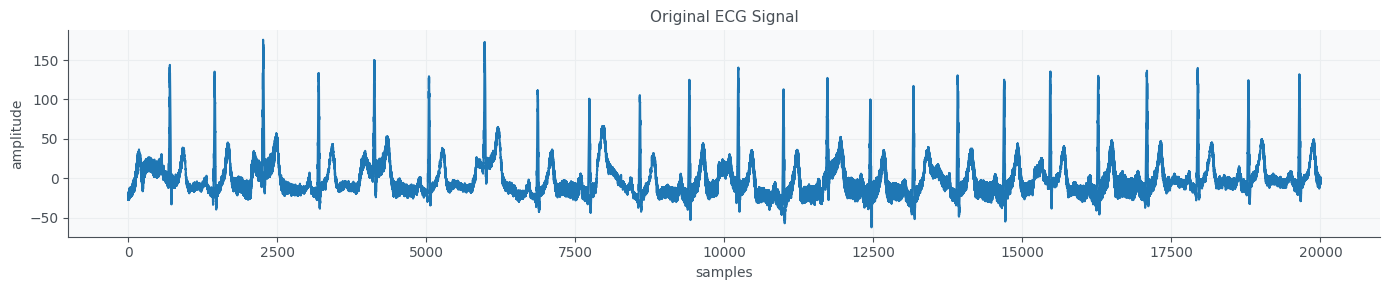

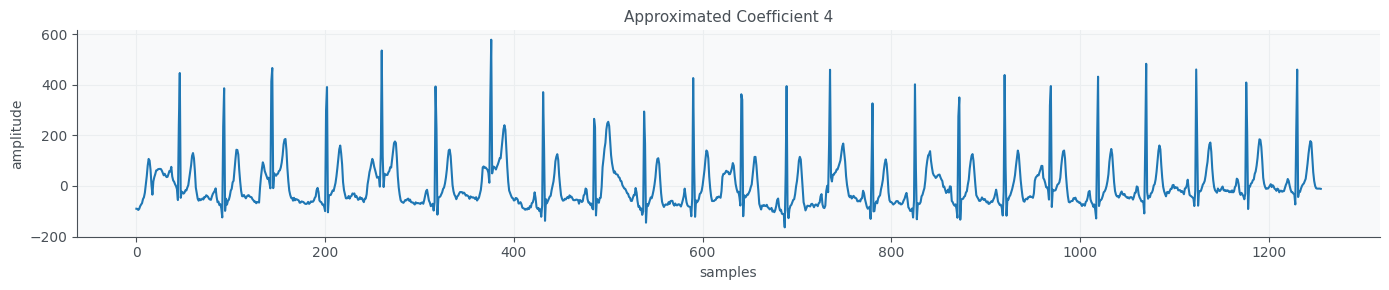

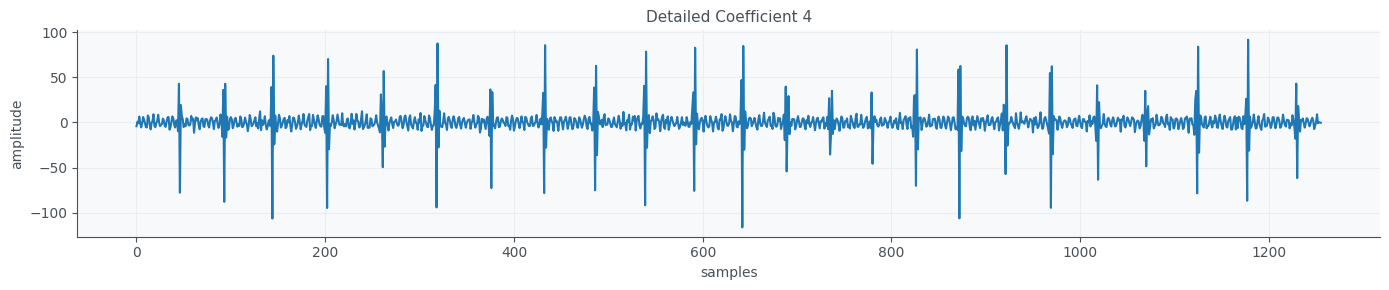

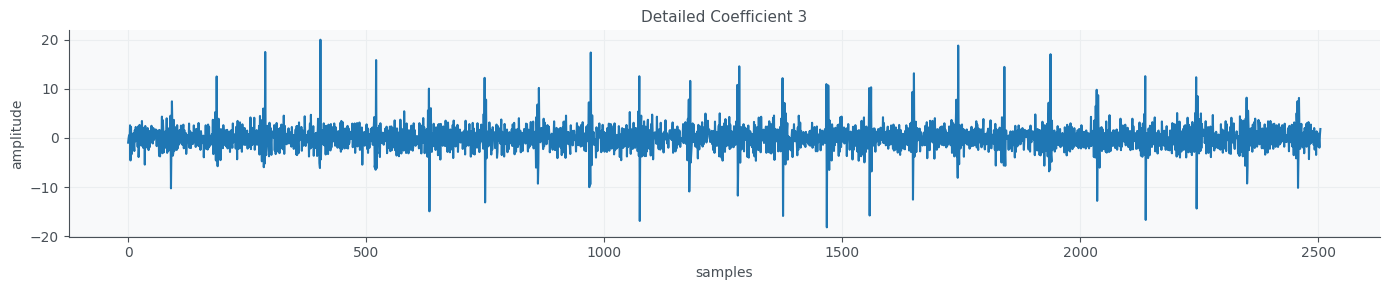

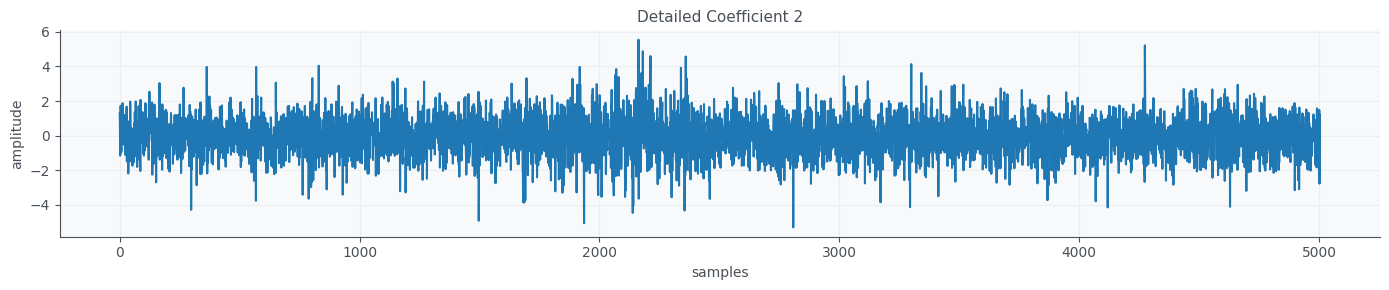

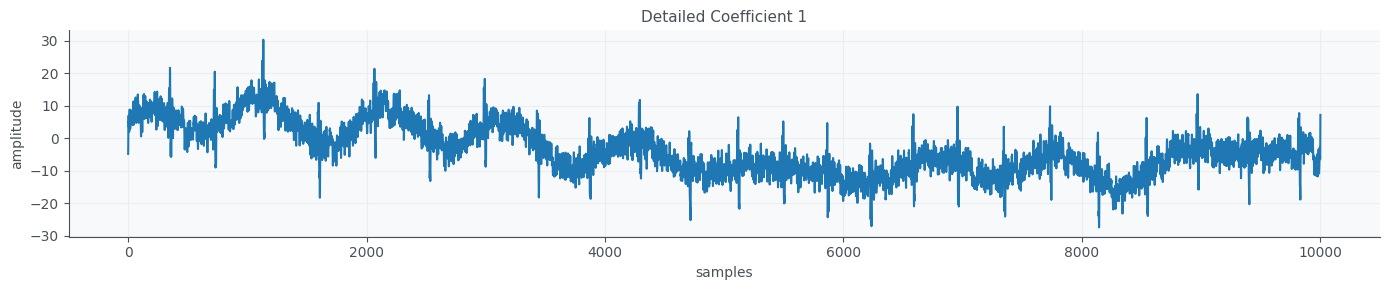

In [55]:
import wfdb
import matplotlib.pyplot as plt
from scipy import signal
import pywt

data = wfdb.rdrecord(filename, channels=[0]).p_signal

[a4, d4, d3, d2, d1] = pywt.wavedec(data, 'sym4', mode='symmetric', level=4)

# plotting the detailed coefficients

plt.figure(figsize=(14, 3))
plt.plot(corrected_data)
plt.title("Original ECG Signal")
plt.xlabel('samples')
plt.ylabel('amplitude')

plt.figure(figsize=(14, 3))
plt.plot(a4)
plt.title("Approximated Coefficient 4")
plt.xlabel('samples')
plt.ylabel('amplitude')

plt.figure(figsize=(14, 3))
plt.plot(d4)
plt.title("Detailed Coefficient 4")
plt.xlabel('samples')
plt.ylabel('amplitude')

plt.figure(figsize=(14, 3))
plt.plot(d3)
plt.title("Detailed Coefficient 3")
plt.xlabel('samples')
plt.ylabel('amplitude')

plt.figure(figsize=(14, 3))
plt.plot(d2)
plt.title("Detailed Coefficient 2")
plt.xlabel('samples')
plt.ylabel('amplitude')

plt.figure(figsize=(14, 3))
plt.plot(d1)
plt.title("Detailed Coefficient 1")
plt.xlabel('samples')
plt.ylabel('amplitude')

plt.show()



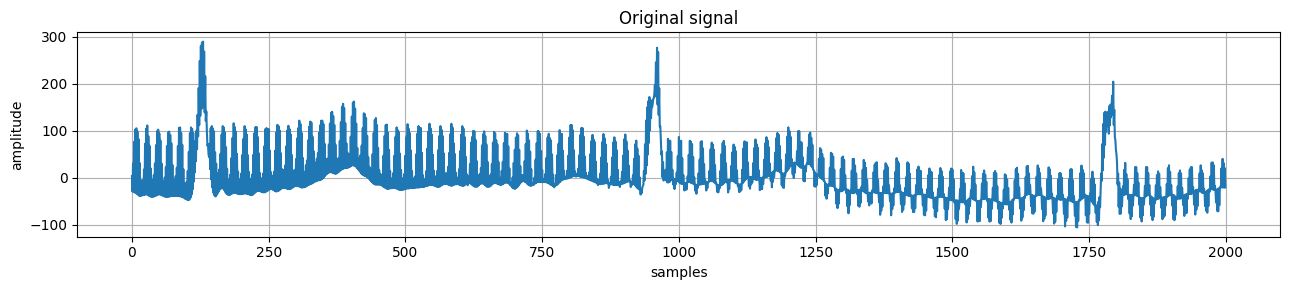

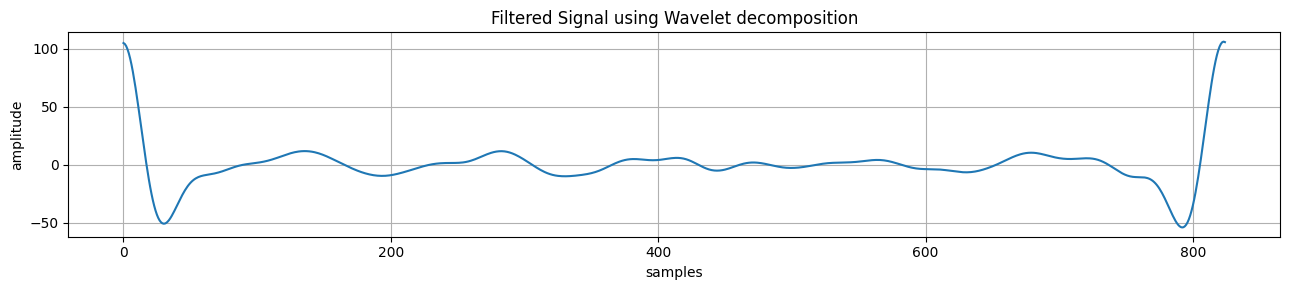

In [42]:
# Reconstructing the ECG signal from the detailed coefficients d2 and d3 and zeroing out all the other coefficients to get the filtered signal

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt


def bandpassFilter(data):
    nyq = 0.5 * 500
    low = 3 / nyq
    high = 12 / nyq
    b, a = signal.butter(3, [low, high], btype='band')
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

def pan_tompkins(ecg_data, fs=500, rel_amplitude=0.5, min_rr=120, max_rr=200):

    # Differentiation
    diff_data = np.diff(ecg_data)

    # Squaring
    squared_data = diff_data**2

    # Moving average filter for smoothing
    window_size = int(0.02 * fs)  # Window size in samples (20 ms)
    average_data = np.convolve(squared_data, np.ones(window_size) / window_size, mode='same')

    # Thresholding
    high_threshold = rel_amplitude * np.max(average_data)
    low_threshold = 0.5 * high_threshold

    # Initialize variables for peak detection
    peaks = []

    # Iterate through data points
    for i in range(len(ecg_data)):
        # Check for peak condition based on thresholds
        if average_data[i] > high_threshold:
            peaks.append(i)

        # Remove false positives based on minimum and maximum RR intervals
        if len(peaks) > 1 and i - peaks[-2] < min_rr:
            peaks.pop()
        elif len(peaks) > 2 and i - peaks[-1] > max_rr:
            peaks.pop()

    return np.array(peaks)

with open('data/Person_03/rec_1.dat', 'rb') as file:
  data = np.fromfile(file, dtype='int16')

#correcting the baseline of the data

corrected_data = signal.detrend(data)

# creating a butter-worth filter or 2nd order
# these are the best frequencie for this data

cutoff_freq = 10
sample_freq = 500 #Hz

b, a = signal.butter(2, cutoff_freq / (sample_freq / 2))

#filtering the signal

filtered_data = signal.filtfilt(b, a, corrected_data)

# applying wavelet transform on the baseline corrected data and then ignoring the high frequency and low frequency components
arr = pywt.wavedec(corrected_data, 'sym4', level=4)

# arr[0] = np.zeros_like(arr[0])
arr[1] = np.zeros_like(arr[1])
# arr[2] = np.zeros_like(arr[2])
# arr[3] = np.zeros_like(arr[3])
arr[4] = np.zeros_like(arr[4])

wavdec_filtered_signal = pywt.waverec(arr, 'sym4')

final_signal = bandpassFilter(wavdec_filtered_signal)

# r_peaks = pan_tompkins(final_signal)

# print(r_peaks)


# fig, axes = plt.subplot()

plt.figure(figsize=(13, 3))
plt.plot(corrected_data[1000:3000])
plt.title("Original signal")
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(13, 3))
plt.plot(final_signal[305:1130])
plt.title("Filtered Signal using Wavelet decomposition")
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.grid(True)
plt.tight_layout()

plt.show()



747.1153846153846
932


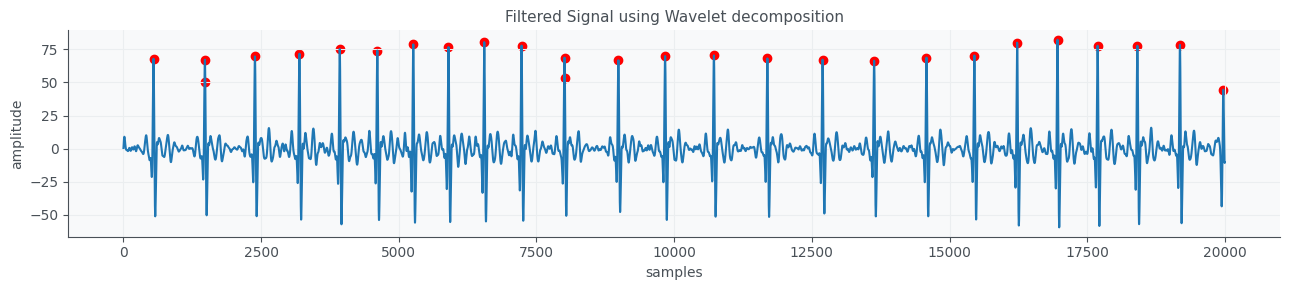

In [2]:
# Reconstructing the ECG signal from the detailed coefficients d2 and d3 and zeroing out all the other coefficients to get the filtered signal

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt
import biosppy


def bandpassFilter(data):
    nyq = 0.5 * 500
    low = 3 / nyq
    high = 12 / nyq
    b, a = signal.butter(3, [low, high], btype='band')
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data


def pan_tompkins(ecg_data, fs=500, rel_amplitude=0.5, min_rr=120, max_rr=200):

    # Differentiation
    diff_data = np.diff(ecg_data)

    # Squaring
    squared_data = diff_data**2

    # Moving average filter for smoothing
    window_size = int(0.02 * fs)  # Window size in samples (20 ms)
    average_data = np.convolve(squared_data, np.ones(window_size) / window_size, mode='same')

    # Thresholding
    high_threshold = rel_amplitude * np.max(average_data)
    low_threshold = 0.5 * high_threshold
    
    peaks = []

    # Iterate through data points
    for i in range(len(ecg_data)):
        # Check for peak condition based on thresholds
        if average_data[i] > high_threshold:
            peaks.append(i)

        # Remove false positives based on minimum and maximum RR intervals
        if len(peaks) > 1 and i - peaks[-2] < min_rr:
            peaks.pop()
        elif len(peaks) > 2 and i - peaks[-1] > max_rr:
            peaks.pop()

    return np.array(peaks)


if __name__=="__main__":

    with open('data/Person_09/rec_5.dat', 'rb') as file:
      data = np.fromfile(file, dtype='int16')

    #correcting the baseline of the data

    corrected_data = signal.detrend(data)

    # creating a butter-worth filter or 2nd order
    # these are the best frequencie for this data

    cutoff_freq = 10
    sample_freq = 500 #Hz

    b, a = signal.butter(2, cutoff_freq / (sample_freq / 2))

    #filtering the signal

    filtered_data = signal.filtfilt(b, a, corrected_data)

    # applying wavelet transform on the baseline corrected data and then ignoring the high frequency and low frequency components
    arr = pywt.wavedec(corrected_data, 'sym4', level=4)

    # arr[0] = np.zeros_like(arr[0])
    arr[1] = np.zeros_like(arr[1])
    # arr[2] = np.zeros_like(arr[2])
    # arr[3] = np.zeros_like(arr[3])
    arr[4] = np.zeros_like(arr[4])

    wavdec_filtered_signal = pywt.waverec(arr, 'sym4')

    final_signal = bandpassFilter(wavdec_filtered_signal)


    results = biosppy.signals.ecg.christov_segmenter(signal=final_signal, sampling_rate=500)

    r_peaks = results['rpeaks']
    
    mean = 0
    
    for i in range(len(r_peaks)-1):
        mean += r_peaks[i+1]-r_peaks[i]
        
    mean /= (len(r_peaks)-1)
    
    print(mean)
    print(r_peaks[1]-r_peaks[0])

    plt.figure(figsize=(13, 3))
    plt.plot(final_signal)
    plt.title("Filtered Signal using Wavelet decomposition")
    plt.xlabel('samples')
    plt.ylabel('amplitude')
    plt.scatter(r_peaks, final_signal[r_peaks], c='red')
    plt.grid(True)
#     plt.ylim([-50, 150])
    plt.tight_layout()

    plt.show()



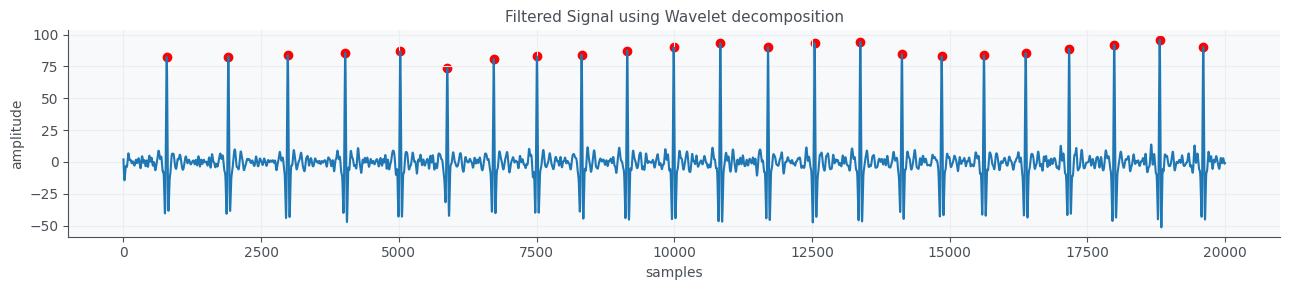

In [43]:
# Reconstructing the ECG signal from the detailed coefficients d2 and d3 and zeroing out all the other coefficients to get the filtered signal

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt
import biosppy
import random


def bandpassFilter(data):
    nyq = 0.5 * 500
    low = 3 / nyq
    high = 12 / nyq
    b, a = signal.butter(3, [low, high], btype='band')
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data


def pan_tompkins(ecg_data, fs=500, rel_amplitude=0.5, min_rr=120, max_rr=200):

    # Differentiation
    diff_data = np.diff(ecg_data)

    # Squaring
    squared_data = diff_data**2

    # Moving average filter for smoothing
    window_size = int(0.02 * fs)  # Window size in samples (20 ms)
    average_data = np.convolve(squared_data, np.ones(window_size) / window_size, mode='same')

    # Thresholding
    high_threshold = rel_amplitude * np.max(average_data)
    low_threshold = 0.5 * high_threshold
    
    peaks = []

    # Iterate through data points
    for i in range(len(ecg_data)):
        # Check for peak condition based on thresholds
        if average_data[i] > high_threshold:
            peaks.append(i)

        # Remove false positives based on minimum and maximum RR intervals
        if len(peaks) > 1 and i - peaks[-2] < min_rr:
            peaks.pop()
        elif len(peaks) > 2 and i - peaks[-1] > max_rr:
            peaks.pop()

    return np.array(peaks)


if __name__=="__main__":

    num = random.randint(1, 180)
    
    fileName = "Normal/" + str(num) + ".dat"
    
    with open(fileName, 'rb') as file:
      data = np.fromfile(file, dtype='int16')

    #correcting the baseline of the data

    corrected_data = signal.detrend(data)

    # creating a butter-worth filter or 2nd order
    # these are the best frequencie for this data

    cutoff_freq = 10
    sample_freq = 500 #Hz

    b, a = signal.butter(2, cutoff_freq / (sample_freq / 2))

    #filtering the signal

    filtered_data = signal.filtfilt(b, a, corrected_data)

    # applying wavelet transform on the baseline corrected data and then ignoring the high frequency and low frequency components
    arr = pywt.wavedec(corrected_data, 'sym4', level=4)

    # arr[0] = np.zeros_like(arr[0])
    arr[1] = np.zeros_like(arr[1])
    # arr[2] = np.zeros_like(arr[2])
    # arr[3] = np.zeros_like(arr[3])
    arr[4] = np.zeros_like(arr[4])

    wavdec_filtered_signal = pywt.waverec(arr, 'sym4')

    final_signal = bandpassFilter(wavdec_filtered_signal)


    results = biosppy.signals.ecg.christov_segmenter(signal=final_signal, sampling_rate=500)

    rTemp = results['rpeaks']
    
    r_peaks = [rTemp[0]]
    
    i = 1
    while i<len(rTemp):
        if rTemp[i]-300>rTemp[i-1]:
            r_peaks.append(rTemp[i])
        i += 1
        
    
    
#     mean = 0
    
#     for i in range(len(r_peaks)-1):
#         mean += r_peaks[i+1]-r_peaks[i]
        
#     mean /= (len(r_peaks)-1)
    
#     print(mean)
#     print(r_peaks[1]-r_peaks[0])

    plt.figure(figsize=(13, 3))
    plt.plot(final_signal)
    plt.title("Filtered Signal using Wavelet decomposition")
    plt.xlabel('samples')
    plt.ylabel('amplitude')
    plt.scatter(r_peaks, final_signal[r_peaks], c='red')
    plt.grid(True)
#     plt.ylim([-50, 150])
    plt.tight_layout()

    plt.show()



In [54]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt
import biosppy
import pandas as pd

def bandpassFilter(data):
    nyq = 0.5 * 500
    low = 3 / nyq
    high = 12 / nyq
    b, a = signal.butter(3, [low, high], btype='band')
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data


def pan_tompkins(ecg_data, fs=500, rel_amplitude=0.5, min_rr=120, max_rr=200):

    diff_data = np.diff(ecg_data)
    squared_data = diff_data**2

    # Moving average filter for smoothing
    window_size = int(0.02 * fs)  # Window size in samples (20 ms)
    average_data = np.convolve(squared_data, np.ones(window_size) / window_size, mode='same')

    # Thresholding
    high_threshold = rel_amplitude * np.max(average_data)
    low_threshold = 0.5 * high_threshold
    
    peaks = []

    # Iterate through data points
    
    for i in range(len(ecg_data)):
        if average_data[i] > high_threshold:
            peaks.append(i)
        if len(peaks) > 1 and i - peaks[-2] < min_rr:
            peaks.pop()
        elif len(peaks) > 2 and i - peaks[-1] > max_rr:
            peaks.pop()

    return np.array(peaks)

def preProcessing(fileName):
    
    with open(fileName, 'rb') as file:
        data = np.fromfile(file, dtype='int16')

    #correcting the baseline of the data

    corrected_data = signal.detrend(data)

    # creating a butter-worth filter or 2nd order
    # these are the best frequencie for this data

    cutoff_freq = 10
    sample_freq = 500 #Hz

    b, a = signal.butter(2, cutoff_freq / (sample_freq / 2))

    #filtering the signal

    filtered_data = signal.filtfilt(b, a, corrected_data)

    # applying wavelet transform on the baseline corrected data and then ignoring the high frequency and low frequency components
    arr = pywt.wavedec(corrected_data, 'sym4', level=4)

    # arr[0] = np.zeros_like(arr[0])
    arr[1] = np.zeros_like(arr[1])
    # arr[2] = np.zeros_like(arr[2])
    # arr[3] = np.zeros_like(arr[3])
    arr[4] = np.zeros_like(arr[4])

    wavdec_filtered_signal = pywt.waverec(arr, 'sym4')

    final_signal = bandpassFilter(wavdec_filtered_signal)

    results = biosppy.signals.ecg.christov_segmenter(signal=final_signal, sampling_rate=500)

    rTemp = results['rpeaks']
    
    r_peaks = [rTemp[0]]
    
    i = 1
    while i<len(rTemp):
        if rTemp[i]-300>rTemp[i-1]:
            r_peaks.append(rTemp[i])
        i += 1
        
    return [final_signal, np.array(r_peaks)]


if __name__=="__main__":
    
    
    fileName = "Normal/" + str(num) + ".dat"
    
    normalN = 193
    abnormalN = 40
    
#     obtained from loop
    min_normal = 17
    min_abnormal = 18
    
#  So, it would be wise to make a table for 15 intervals
        
    
    
#     mean = 0
    
#     for i in range(len(r_peaks)-1):
#         mean += r_peaks[i+1]-r_peaks[i]
        
#     mean /= (len(r_peaks)-1)
    
#     print(mean)
#     print(r_peaks[1]-r_peaks[0])

#     plt.figure(figsize=(13, 3))
#     plt.plot(final_signal)
#     plt.title("Filtered Signal using Wavelet decomposition")
#     plt.xlabel('samples')
#     plt.ylabel('amplitude')
#     plt.scatter(r_peaks, final_signal[r_peaks], c='red')
#     plt.grid(True)
# #     plt.ylim([-50, 150])
#     plt.tight_layout()

#     plt.show()
            




18


[-20 -12 -17 ...  -9 -11  -9]


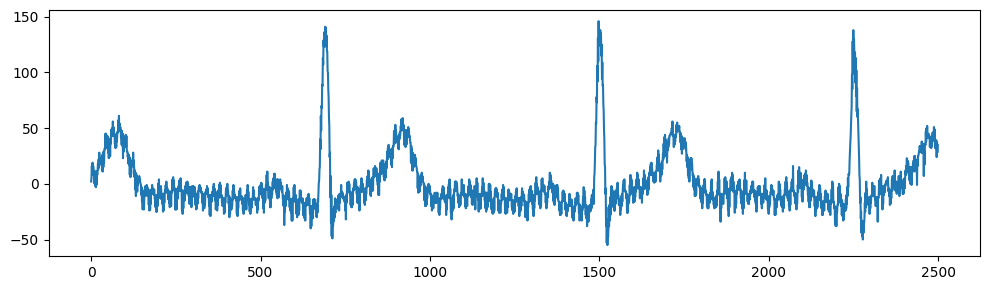

In [5]:
import numpy as np
import matplotlib.pyplot as plt

with open("data/normal/1.dat") as file:
    data = np.fromfile(file, dtype="int16")
    
print(data)

plt.figure(figsize=(10, 3))
plt.plot(data[500:3000])

plt.tight_layout()

plt.show()

In [7]:
import cv2

# Read the image
image = cv2.imread("a.jpg")

# Convert the image to grayscale (Canny works better with grayscale images)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blurring to reduce noise (optional but recommended)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Canny edge detection
canny_edges = cv2.Canny(blurred_image, 70, 135)

# Display the original image and the edge detected image
cv2.imshow("Original Image", image)
cv2.imshow("Canny Edges", canny_edges)

# Wait for a key press to close the windows
cv2.waitKey(0)

# Close all open windows
cv2.destroyAllWindows()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
import wfdb
import matplotlib.pyplot as plt
from scipy import signal
import pywt

data = wfdb.rdrecord(filename, channels=[0]).p_signal

[a4, d4, d3, d2, d1] = pywt.wavedec(data, 'sym4', mode='symmetric', level=4)

arr[1] = np.zeros_like(arr[1])
arr[4] = np.zeros_like(arr[4])

wavdec_filtered_signal = pywt.waverec(arr, 'sym4')

plt.figure(figsize=(13, 3))
plt.plot(corrected_data[1000:3000])
plt.title("Original signal")
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(13, 3))
plt.plot(final_signal[1000:3000])
plt.title("Filtered Signal using Wavelet decomposition")
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.grid(True)
plt.tight_layout()

plt.show()
